In [7]:
import pandas as pd
import numpy as np
from IPython.display import  display,HTML
import seaborn as sns
import sys 
import os
%load_ext autoreload
sys.path.insert(0, '../../credit_card_approval_system/')
from src.utility import plotValueCounts,get_accuracy,get_f1_score,get_precision,plotBoxPlots,get_recall
from src.config import TRAINING_FILE,MODELS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
credit_card_dataset=pd.read_csv(TRAINING_FILE)

In [9]:
credit_card_dataset.drop("Unnamed: 0",inplace=True,axis=1)

### EDA

In [10]:
credit_card_dataset.Approved.value_counts()

-    383
+    307
Name: Approved, dtype: int64

### data is not  imbalanced
###

In [11]:
features_conituos=['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']

In [12]:
features_categorical=['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship']

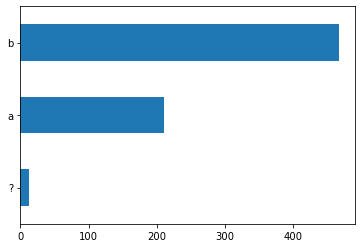

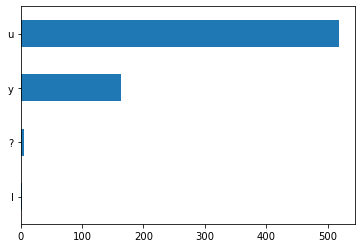

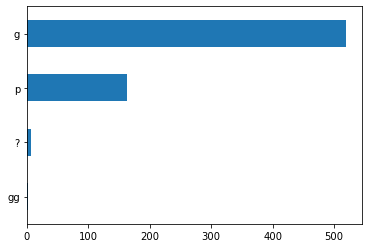

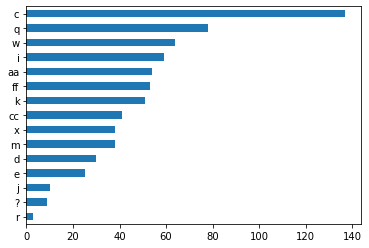

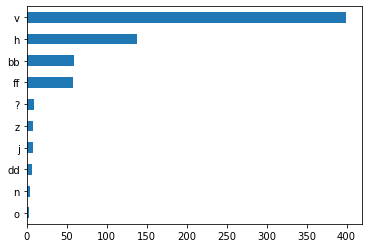

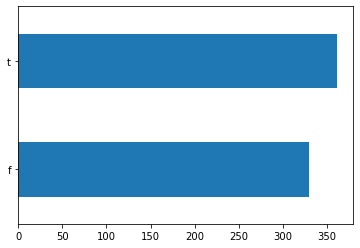

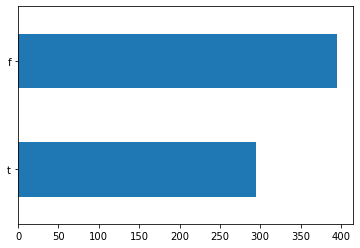

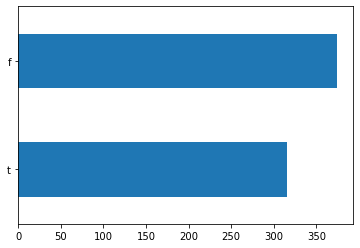

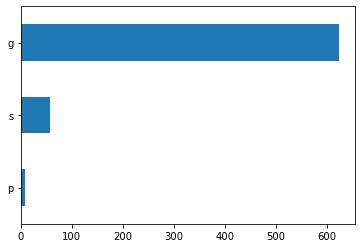

In [13]:
plotValueCounts(credit_card_dataset,features_categorical)

In [14]:
def replace_missingvalues_categorical(df, colNames):
    for col in colNames[:]:
        temp = df[col].value_counts().to_dict()
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)

In [15]:
def replcae_missingvalues_continuos(df,colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())


In [16]:
replace_missingvalues_categorical(credit_card_dataset,features_categorical)

In [17]:
replcae_missingvalues_continuos(credit_card_dataset,features_conituos)

In [18]:
### Ordinal Encoding--- Change
def convertStringToNumeric(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [20]:
columnsToEncode=['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved']

In [21]:
for column in columnsToEncode:
    credit_card_dataset[column+'_encoded'] = labelencoder.fit_transform(credit_card_dataset[column])


In [22]:
credit_card_dataset_encoded=credit_card_dataset.drop(columns=columnsToEncode)

In [23]:
convertStringToNumeric(credit_card_dataset,['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

In [24]:
credit_card_dataset

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,...,Gender_encoded,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded
0,0,30.83,0.000,0,0,0,0,1.25,0,0,...,1,1,0,12,7,1,1,0,0,0
1,1,58.67,4.460,0,0,1,1,3.04,0,0,...,0,1,0,10,3,1,1,0,0,0
2,1,24.50,0.500,0,0,1,1,1.50,0,1,...,0,1,0,10,3,1,0,0,0,0
3,0,27.83,1.540,0,0,0,0,3.75,0,0,...,1,1,0,12,7,1,1,1,0,0
4,0,20.17,5.625,0,0,0,0,1.71,0,1,...,1,1,0,12,7,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,1,1,10,1,1.25,1,1,...,1,2,2,4,3,0,0,0,0,1
686,1,22.67,0.750,0,0,6,0,2.00,1,0,...,0,1,0,1,7,0,1,1,0,1
687,1,25.25,13.500,1,1,12,3,2.00,1,0,...,0,2,2,5,2,0,1,1,0,1
688,0,17.92,0.205,0,0,11,0,0.04,1,1,...,1,1,0,0,7,0,0,0,0,1


### Feature Scaling

### Box Plot

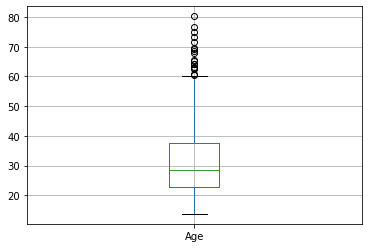

count    690.000000
mean      31.568171
std       11.853273
min       13.750000
25%       22.670000
50%       28.625000
75%       37.707500
max       80.250000
Name: Age, dtype: float64

In [25]:

plotBoxPlots(credit_card_dataset,['Age'])
credit_card_dataset['Age'].describe()

In [26]:
features_to_scale = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_card_dataset[features_to_scale] = scaler.fit_transform(credit_card_dataset[features_to_scale])
# credit_card_dataset_encoded[features_to_scale] = scaler.fit_transform(credit_card_dataset_encoded[features_to_scale])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years Employed', ylabel='Density'>

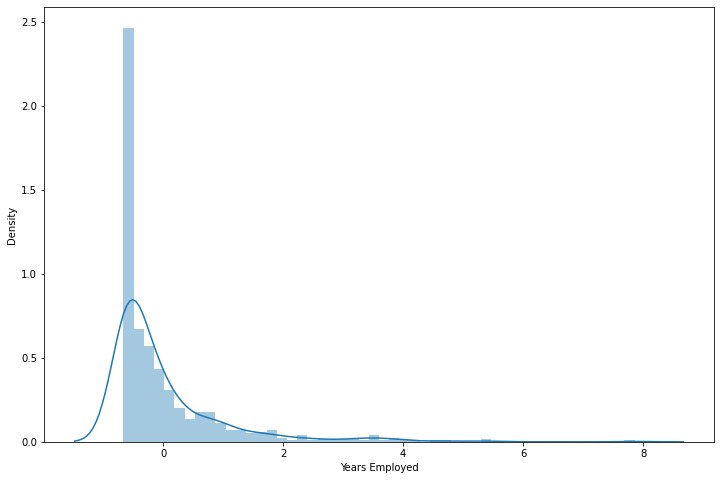

In [27]:
import matplotlib.pyplot as plt
dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)
p = features_to_scale[2]
sns.distplot(credit_card_dataset[p])

### Deciding Features

In [28]:
cMatrix=credit_card_dataset.corr()

In [29]:
cMatrix

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,...,Gender_encoded,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded
Gender,1.000000,-0.035604,0.041746,-0.061926,-0.061926,0.088308,0.069222,-0.086544,-0.026047,-0.077784,...,-1.000000,-0.071143,-0.067666,0.010507,-0.054260,0.026047,0.077784,-0.051674,-0.085488,-0.028934
Age,-0.035604,1.000000,0.201316,-0.103857,-0.103857,0.127897,0.213122,0.392787,-0.204342,-0.083681,...,0.035604,-0.081809,-0.094514,0.038152,-0.165827,0.204342,0.083681,0.054778,-0.014584,-0.161627
Debt,0.041746,0.201316,1.000000,-0.082747,-0.082747,0.072855,0.088177,0.298902,-0.244317,-0.174846,...,-0.041746,-0.109538,-0.097738,-0.003423,-0.051098,0.244317,0.174846,-0.013023,-0.122233,-0.206294
Married,-0.061926,-0.103857,-0.082747,1.000000,1.000000,0.121328,0.121248,-0.075466,0.168216,0.192809,...,0.061926,0.932131,0.983085,-0.027344,-0.010849,-0.168216,-0.192809,-0.001514,0.031970,0.158864
Bank Customer,-0.061926,-0.103857,-0.082747,1.000000,1.000000,0.121328,0.121248,-0.075466,0.168216,0.192809,...,0.061926,0.932131,0.983085,-0.027344,-0.010849,-0.168216,-0.192809,-0.001514,0.031970,0.158864
Education,0.088308,0.127897,0.072855,0.121328,0.121328,1.000000,0.417063,-0.078511,0.167138,0.149396,...,-0.088308,0.112164,0.118806,-0.496204,-0.298039,-0.167138,-0.149396,-0.102291,-0.038520,0.196096
Ethnicity,0.069222,0.213122,0.088177,0.121248,0.121248,0.417063,1.000000,0.027895,0.096087,0.034621,...,-0.069222,0.073809,0.099366,0.027678,-0.541284,-0.096087,-0.034621,-0.060483,0.008162,0.042325
Years Employed,-0.086544,0.392787,0.298902,-0.075466,-0.075466,-0.078511,0.027895,1.000000,-0.345689,-0.222982,...,0.086544,-0.092937,-0.085616,0.013322,-0.106371,0.345689,0.222982,0.138139,-0.020528,-0.322475
Prior Default,-0.026047,-0.204342,-0.244317,0.168216,0.168216,0.167138,0.096087,-0.345689,1.000000,0.432032,...,0.026047,0.149227,0.161541,-0.078672,0.040608,-1.000000,-0.432032,-0.091276,0.113623,0.720407
Employed,-0.077784,-0.083681,-0.174846,0.192809,0.192809,0.149396,0.034621,-0.222982,0.432032,1.000000,...,0.077784,0.177769,0.188559,-0.095968,0.006879,-0.432032,-1.000000,-0.017043,0.242568,0.458301


In [30]:
final_features = ['Age', 'Debt', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Income']


In [31]:
final_features_encoded=['Age', 'Debt', 'Ethnicity_encoded', 'Years Employed', 'Prior Default_encoded', 'Employed_encoded', 'Credit Score', 'Driving License_encoded', 'Income']

In [34]:
credit_card_dataset.to_csv("../data/training_data_processed.csv")